# Introduction
Currently, when a MuscleHub visitor purchases a membership, they follow the following steps:

1. Take a fitness test with a personal trainer.
2. Fill out an application for the gym.
3. Send in their payment for their first month’s membership.

We are suspecting the fitness test might intimidate some potential clients, thus apply an A/B test to figure it out.

# Scoping
The scoping section will be segmented into four sections: goal, action, data, and analysis

## Goal
The goal of the current project is to test out whether applying fitness test could decrease the number of client that fill out an application and/or the number of clients who actually bought in. The following hypotheses will be tested:

Null Hypothesis 1 = There is no difference between the visitors in Group A that filled out application and the visitors in Group B that filled out application.

Null Hypothesis 2 = There is no difference between the visitors in Group A that purchase membership and the visitors in Group B that purchase membership.

## Action
We will analyze exising data provided by Codecademy. Primarily, python would be the code for analysis.

## Data
There are four csv files given:

`applications.csv`
`fitness_tests.csv`
`purchases.csv`
`visits.csv`

## Analysis
Descriptive analysis, inferential analysis, and data visualisation will be employed to test out the hypotheses.

## Import Modules

In [1]:
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

## Load files
`applications.csv` `fitness_tests.csv` `purchases.csv` `visits.csv` will be imported with pandas and named as 'app','test','purchases' and 'visit', respectively.

### visit
The `visits.csv` file contains personal information of who visited the gym and the date when they visited.

In [7]:
visit = pd.read_csv('visits.csv').sort_values('email')
display(visit.head())

,first_name,last_name,email,gender,visit_date
1882,Alvin,Ayala,AA1752@gmail.com,male,7-23-17
5743,Arnold,Albert,AA5439@gmail.com,male,9-5-17
5889,Anna,Aguilar,AA9306@gmail.com,female,9-8-17
2905,Alberto,Aguirre,AA9333@gmail.com,male,8-13-17
4039,Andy,Avery,AAvery1981@gmail.com,male,8-5-17


### test
The `fitness_tests.csv`file contains personal information of who did the fitness test and the data when they were tested.

In [8]:
test = pd.read_csv('fitness_tests.csv').sort_values('email')
display(test.head())

,first_name,last_name,email,gender,fitness_test_date
434,Alvin,Ayala,AA1752@gmail.com,male,2017-07-25
2443,Anna,Aguilar,AA9306@gmail.com,female,2017-09-09
1371,Ashley,Avila,AAvila1987@gmail.com,female,2017-08-31
1714,Arlene,Brennan,AB5451@gmail.com,female,2017-09-03
1664,Alexander,Boyle,AB5498@gmail.com,male,2017-08-11


### app
The `applications.csv` file contains personal information of who filled out the application form and the date when they filled it out.

In [9]:
app=pd.read_csv('applications.csv').sort_values('email')
display(app.head())

,first_name,last_name,email,gender,application_date
7,Anna,Aguilar,AA9306@gmail.com,female,2017-09-10
12,Ashley,Avila,AAvila1987@gmail.com,female,2017-08-31
19,Arnold,Ballard,ABallard1998@hotmail.com,male,2017-08-16
116,Alice,Compton,AC3144@gmail.com,female,2017-07-08
111,Anita,Cline,ACline1970@gmail.com,female,2017-09-05


### pur
The `purchases.csv` file contains personal information of who sent in their payment and the date when they purchased.

In [5]:
pur = pd.read_csv('purchases.csv').sort_values('email')
display(pur.head())

,first_name,last_name,email,gender,purchase_date
6,Anna,Aguilar,AA9306@gmail.com,female,2017-09-16
11,Ashley,Avila,AAvila1987@gmail.com,female,2017-09-04
15,Arnold,Ballard,ABallard1998@hotmail.com,male,2017-08-16
91,Alice,Compton,AC3144@gmail.com,female,2017-07-11
212,Alice,Houston,AH6808@gmail.com,female,2017-09-13


## Data Characteristics

In [11]:
print(f'visits shape:{visit.shape}')
print(f'fitness_test shape:{test.shape}')
print(f'applications shape:{app.shape}')
print(f'purchases shape:{pur.shape}')

visits shape:(6000, 5)
fitness_test shape:(2500, 5)
applications shape:(575, 5)
purchases shape:(450, 5)


We can tell the number of subjects of each tables gradually decrease, which is normal based on the flow of membership purhcase.

## Data Merging
All four DataFrames shared the same primary key, which is email. We will combine all four DataFrame here with join key set as first name, last name, and email.

In [13]:
app_test = pd.merge(app,test, left_on = ['first_name','last_name','email'],right_on=['first_name','last_name','email'],how='outer')
app_test_pur = pd.merge(app_test,pur,left_on=['first_name','last_name','email'],right_on=['first_name','last_name','email'],how='outer')
all_df=pd.merge(app_test_pur,visit,left_on=['first_name','last_name','email'],right_on=['first_name','last_name','email'],how='outer')
all_df=all_df[all_df['visit_date']>='7-1-17']

/var/folders/md/hbrjvx4s3nb147_zj3mhjbth0000gn/T/ipykernel_88646/3215076439.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'gender_x'} in the result is deprecated and will raise a MergeError in a future version.
  all_df=pd.merge(app_test_pur,visit,left_on=['first_name','last_name','email'],right_on=['first_name','last_name','email'],how='outer')


In [14]:
print(all_df.shape)

(5004, 11)


### Create A/B label
We are setting those who did not perform fitness test as 'A', which would have no value on the column `fitness_test_date`. Those who did perform fitness test would be categorized as 'B' group

In [15]:
all_df['test_or_not'] = ['A' if pd.isnull(x) else 'B' for x in all_df['fitness_test_date']]
print(all_df['test_or_not'].value_counts())

B    2504
A    2500
Name: test_or_not, dtype: int64


We are having similar number of subjects in each group, suggesting eligible to perform A/B test.

## Analysis

To see the difference between A and B group, we will first examine the rate of subjects who did filled out application

In [16]:
# Label those who did not fill out application form as 'À'
all_df['app_or_not']=['A' if pd.isnull(x) else 'B' for x in all_df['application_date']]

In [51]:
test_and_app=all_df.groupby(['test_or_not','app_or_not']).size().reset_index(name='count').pivot(index='test_or_not',columns='app_or_not',values='count').reset_index()
test_and_app['total']=test_and_app.sum(axis=1)
test_and_app['ratio_of_app']=test_and_app['B']/test_and_app['total']
display(test_and_app)

/var/folders/md/hbrjvx4s3nb147_zj3mhjbth0000gn/T/ipykernel_88646/1776345039.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_and_app['total']=test_and_app.sum(axis=1)


app_or_not,test_or_not,A,B,total,ratio_of_app
0,A,2175,325,2500,0.13000
1,B,2254,250,2504,0.09984


We can tell from this table that those who did not participate in fitness test (A in test_or_not) have higher percentage of participants who did filled out the application form.

Let's perform Chi-square test to see if significant difference exist.

In [42]:
contingency1=test_and_app.iloc[:,:2]
chi,p_value,_,_=chi2_contingency(contingency1)
print(f'p-value:{p_value}')

p-value:0.0009647827600722304


#### The p_value is under the threshold of 0.05, suggesting significant difference exists. 
Those who did not participate in fitness test (group A) has significantly higher ratio of subjects who filled out the application form.

We will next examine the difference in ratio of membership purchase.

In [33]:
# Label those who did not purchase membership as 'À'
all_df['pur_or_not']=['A' if pd.isnull(x) else 'B' for x in all_df['purchase_date']]

In [37]:
test_and_pur=all_df[all_df['app_or_not']=='B'].groupby(['test_or_not','pur_or_not']).size().reset_index(name='count')\
.pivot(index='test_or_not',columns='pur_or_not',values='count')
test_and_pur['total']=test_and_pur.sum(axis=1)
test_and_pur['ratio_of_pur']=test_and_pur['B']/test_and_pur['total']
display(test_and_pur)

pur_or_not,A,B,total,ratio_of_pur
test_or_not,,,,
A,75,250,325,0.769231
B,50,200,250,0.800000


It seems like those who did not participate in the fitness test has lower ratio of membership purchase.
We will perform Chi-square test in the following section.

In [43]:
contingency2=test_and_pur.iloc[:,:2]
chi_2,p_value_2,_,_=chi2_contingency(contingency2)
print(f'p-value:{p_value_2}')

p-value:0.43258646051083327


The p_value (0.433) indicates that there is no significant difference, we can only conclude that there is a trend showing participation of fitness test could potentially leads to membership buy-in.

In the previous section, we examine the difference in ratio of purchase of **those who did filled out application**.
We will take a look at the difference in ratio of purchase of **all participants**.

In [39]:
test_and_pur_all=all_df.groupby(['test_or_not','pur_or_not']).size().reset_index(name='count')\
.pivot(index='test_or_not',columns='pur_or_not',values='count')
test_and_pur_all['total']=test_and_pur_all.sum(axis=1)
test_and_pur_all['ratio_of_pur']=test_and_pur_all['B']/test_and_pur_all['total']
display(test_and_pur_all)

pur_or_not,A,B,total,ratio_of_pur
test_or_not,,,,
A,2250,250,2500,0.100000
B,2304,200,2504,0.079872


Overall, it seems like the participation of fitness test could be an obstacle of membership purchase. Let's examine the significance of difference.

In [41]:
contingency3=test_and_pur_all.iloc[:,:2]
chi_3,p_value_3,_,_ = chi2_contingency(contingency3)
print(f'p-value:{p_value_3}')

p-value:0.0147241146457832


The p-value indicates that of there is a significant difference in the ratio of membership purchase between group A and B.

## Visualization 


I will visualize the result with significant difference in order to better illustrate my findings.
Starting with the difference in ratio of application between those who did not get tested and those who did.

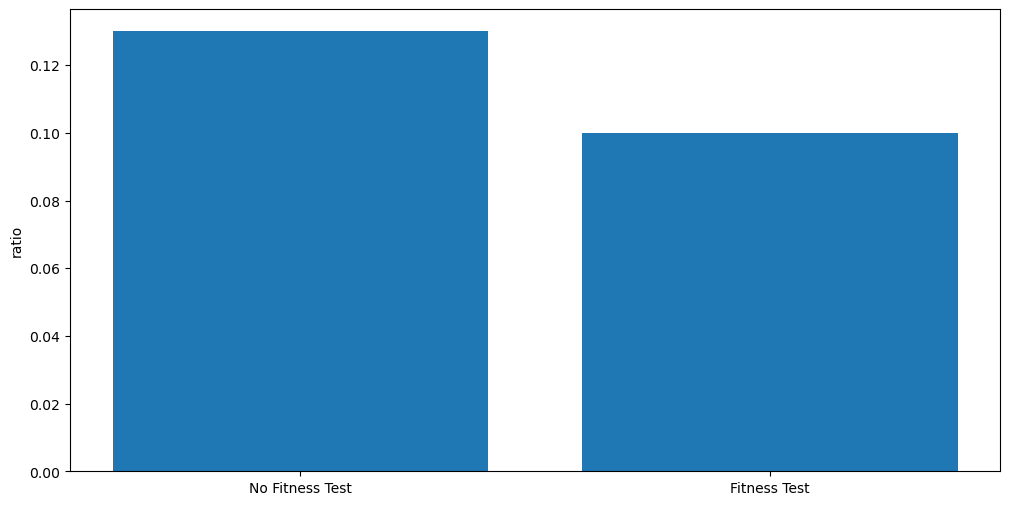

In [57]:
fig = plt.figure(figsize=(12,6))
plt.bar(range(len(test_and_app['test_or_not'])),test_and_app['ratio_of_app'])
plt.xticks(range(len(test_and_app['test_or_not'])),['No Fitness Test', 'Fitness Test'])
plt.ylabel('ratio')
plt.show()

In this section, I will visualize the difference in ratio of membership purchase between those who did not get tested and those who did.

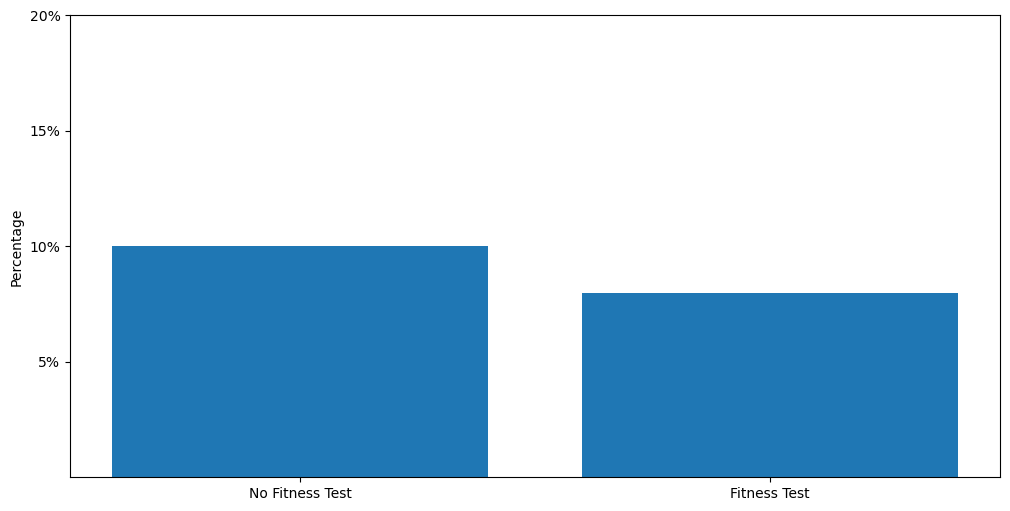

In [62]:
fig2 = plt.figure(figsize=(12,6))
plt.bar(range(len(test_and_pur_all)),test_and_pur_all['ratio_of_pur'])
plt.xticks(range(len(test_and_pur_all)),['No Fitness Test','Fitness Test'])
plt.yticks([0.05, 0.10, 0.15, 0.20], ['5%', '10%', '15%', '20%'])
plt.ylabel('Percentage')
plt.show()

## Conclusion
This project is aimed to understand whether fitness test can deteriorate membership purchase.
Here are what we found:
- fitness test can significantly lower the ratio of application of all gym visitors.
- Of those who did fill out application form, fitness test has no significant effect on membership purchase.
- Of all gym visitors, fitness test has significant effect on membership purchase.

## Future Research
- Current A/B test only compare ratio of application and purchase, it would be more informative to compare:
    - the usage of membership
    - the length of membership
    - whether the client introduce other visitor to the gym